# IMPORTING REQUIRED LIBRARY API'S

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.kernel_ridge import KernelRidge
from pandas.tools.plotting import scatter_matrix
from sklearn import svm, cross_validation
from sklearn.preprocessing import scale
import itertools
import warnings
import random
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

# LOAD DATASET
<li> SInce the entire dataset of 245057 entries was causing the memory dump/dead kernel due to high computation requirement
<li>I decided to select a smaller sample which very nearly symbolizes the main dataset.
<li>Smaller dataset has allowed me execute the code before crashing of the kernel
<li>I've used the below mentioned method to select sample dataset. It is very well distributed over the main dataset.
<li>So the values/predictions/models fit the main dataset as well

In [3]:
fname = '/Users/anishine912/Downloads/ML Exam/classification_data.tsv'
#df = pd.read_table(fname)

In [4]:
n = 245057
s = 2000
skip = sorted(random.sample(range(n),n-s))

In [5]:
df = pd.read_table(fname, skiprows=skip)

In [6]:
df.columns = ['Red', 'Green', 'Blue', 'Class']

# DATA EXPLORATION

In [7]:
df.head()

,Red,Green,Blue,Class
0,215,223,255,1
1,200,211,255,1
2,80,87,130,1
3,198,209,253,1
4,200,210,250,1


In [8]:
y = df['Class']
X = df.iloc[:,:3]

In [9]:
X.corr()

,Red,Green,Blue
Red,1.000000,0.864011,0.517474
Green,0.864011,1.000000,0.670057
Blue,0.517474,0.670057,1.000000


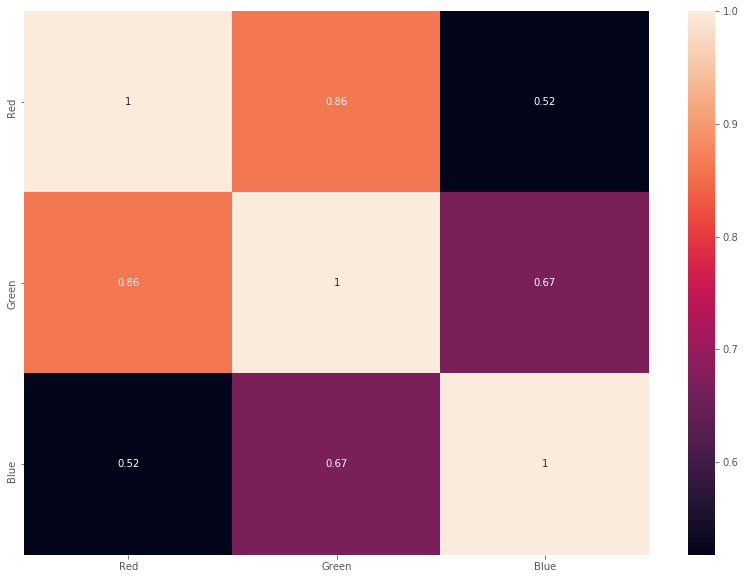

In [10]:
import seaborn as sns
corr = X.corr()
f, ax = plt.subplots(figsize = (14,10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot = True)
plt.show()

In [11]:
df.Class.value_counts()

2    1606
1     394
Name: Class, dtype: int64

In [13]:
#class 1_original
print('Class 1 original distribution :', 50859/245057.0)
#class 1_sample
print('Class 1 sample distribution :', 394/2000)

Class 1 original distribution : 0.20753947040892526
Class 1 sample distribution : 0.197


In [14]:
#class 2_original
print('Class 2 original distribution :', 194198/245057.0)
#class 2_sample
print('Class 2 sample distribution :', 1606/2000)

Class 2 original distribution : 0.7924605295910747
Class 2 sample distribution : 0.803


### EDA - Exploratory Data Analysis
Learn about the data :
Things to learn - 
<li> Is it Categorical?
<li> If not what are the min, max and avgerage values?
<li> If it is... what are the categories
<li> are there any missing values?
<li> Something about the distribution of the variable

In [15]:
X.describe()

,Red,Green,Blue
count,2000.000000,2000.000000,2000.000000
mean,125.051000,131.817000,122.629500
std,61.831836,59.957293,72.535936
min,0.000000,0.000000,0.000000
25%,70.000000,84.000000,72.000000
50%,139.000000,153.000000,128.000000
75%,176.000000,177.000000,163.000000
max,255.000000,255.000000,255.000000


# VISUALIZATION

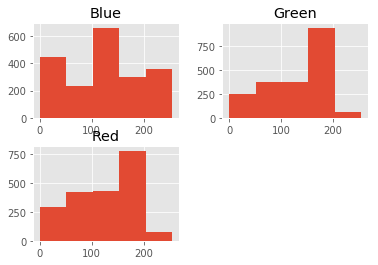

In [16]:
X.hist(bins = 5)
plt.show()

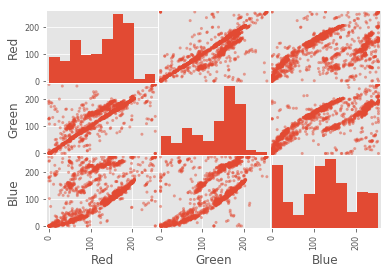

In [17]:
scatter_matrix(X)
plt.show()

### No null/missing values 

## FUNCTION for PLOT of confusion matrix
                                                         _ref from sklearn examples 

### The following function calculates the confusion matrix and normalizes that matrix as well, and then plots a figure to show the matrix distributions as per the confusion matrix

In [18]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #tick_marks = np.arange(len(classes))
    #plt.xticks(tick_marks, rotation=45)
    #plt.yticks(tick_marks)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# LOGISTIC REGRESSION

### Perfroms the logistic regression using LogisticRegression() 

In [19]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

In [21]:
model = LogisticRegression(penalty = 'l2', C = 1, random_state=42)

In [22]:
#scores = cross_val_score(model, X, y , cv = 5)
#print ('accuracy : ',np.mean(scores) )
model.fit(x_train, y_train)
pred = model.predict(x_test)

Confusion matrix, without normalization
[[ 73  18]
 [ 20 289]]
Normalized confusion matrix
[[ 0.8   0.2 ]
 [ 0.06  0.94]]


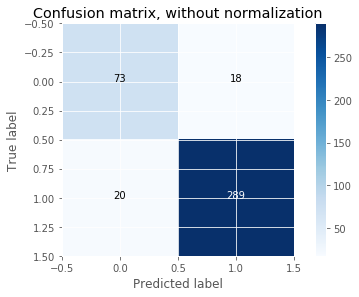

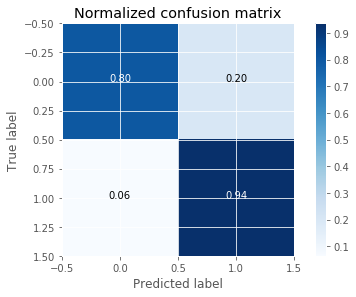

In [23]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [24]:
scores = cross_val_score(model, X, y , cv = 5)
print ('accuracy : ',np.mean(scores) )

accuracy :  0.909553415959


# SOFT MARGIN SVM
<li> Soft margin svm is basically any commonly used svm function
<li> When C = defaultvalue = 1.0 the svm is soft margin

In [25]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(x_train, y_train)
pred = linear_svc.predict(x_test)

Confusion matrix, without normalization
[[ 81  10]
 [ 26 283]]
Normalized confusion matrix
[[ 0.89  0.11]
 [ 0.08  0.92]]


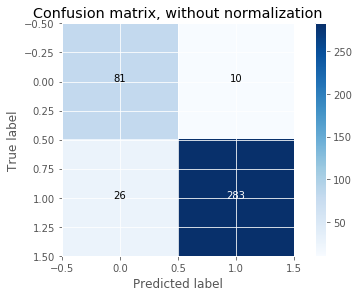

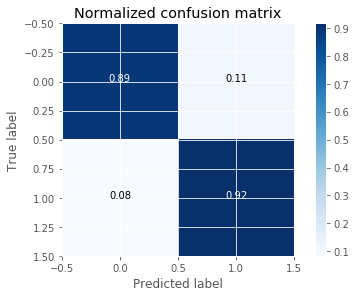

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [27]:
scores = cross_val_score(linear_svc, X, y, cv = 5)
print ('accuracy : ',np.mean(scores) )

accuracy :  0.905045890912


In [28]:
poly_svc = svm.SVC(kernel='poly', gamma=1)
poly_svc.fit(x_train, y_train)
pred = poly_svc.predict(x_test)

Confusion matrix, without normalization
[[ 78  13]
 [ 12 297]]
Normalized confusion matrix
[[ 0.86  0.14]
 [ 0.04  0.96]]


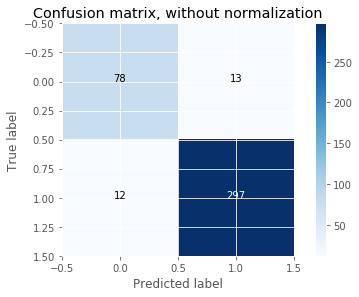

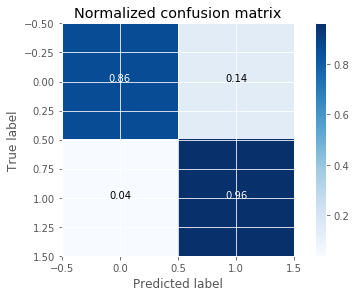

In [29]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [30]:
scores = cross_val_score(poly_svc, X, y, cv = 5)
print ('accuracy : ',np.mean(scores) )

accuracy :  0.943539781499


In [31]:
rbf_svc = svm.SVC(kernel='rbf', gamma=1)
rbf_svc.fit(x_train, y_train)
pred = rbf_svc.predict(x_test)

Confusion matrix, without normalization
[[ 91   0]
 [  4 305]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.01  0.99]]


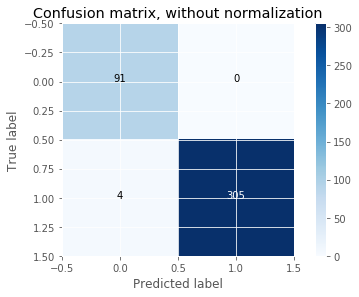

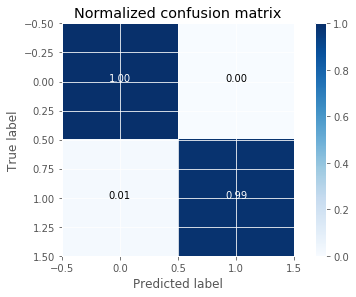

In [32]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [33]:
scores = cross_val_score(poly_svc, X, y, cv = 5)
print ('accuracy : ',np.mean(scores) )

accuracy :  0.943539781499


# HARD MARGIN SVM
<li>Hard margin svm has large penalties for boundary violatins
<li>I choose a high value of C to increse the penalization
<li>For some higher values of C the svm fails 
<li>I have considered C = 1000 for all the kernels
<li>Another thing is that changes in the maxiterations also can affect the Hard margin SVM 

In [34]:
linear_svc = svm.SVC(kernel='linear',C=1000)
linear_svc.fit(x_train, y_train)
pred = linear_svc.predict(x_test)

Confusion matrix, without normalization
[[ 80  11]
 [ 26 283]]
Normalized confusion matrix
[[ 0.88  0.12]
 [ 0.08  0.92]]


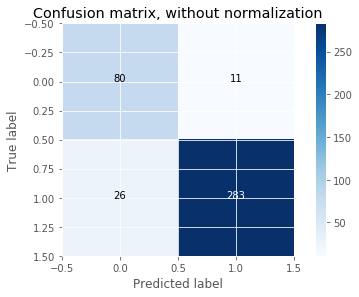

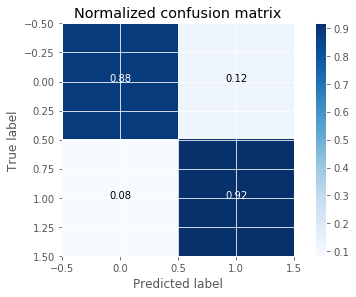

In [35]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [36]:
scores = cross_val_score(linear_svc, X, y, cv = 5)
print ('accuracy : ',np.mean(scores) )

accuracy :  0.903547137795


In [37]:
poly_svc = svm.SVC(kernel='poly', C=1000)
poly_svc.fit(x_train, y_train)
pred = poly_svc.predict(x_test)

Confusion matrix, without normalization
[[ 78  13]
 [ 10 299]]
Normalized confusion matrix
[[ 0.86  0.14]
 [ 0.03  0.97]]


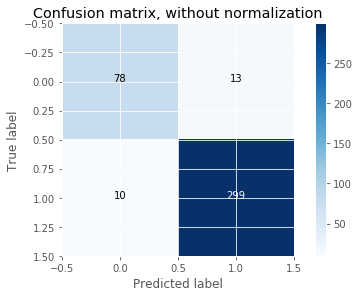

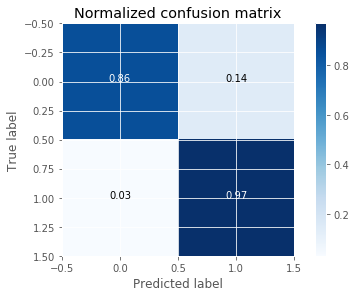

In [38]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [39]:
scores = cross_val_score(poly_svc, X, y, cv = 5)
print ('accuracy : ',np.mean(scores) )

accuracy :  0.946041034631


In [40]:
rbf_svc = svm.SVC(kernel='rbf', C=1000)
rbf_svc.fit(x_train, y_train)
pred = rbf_svc.predict(x_test)

Confusion matrix, without normalization
[[ 91   0]
 [  0 309]]
Normalized confusion matrix
[[ 1.  0.]
 [ 0.  1.]]


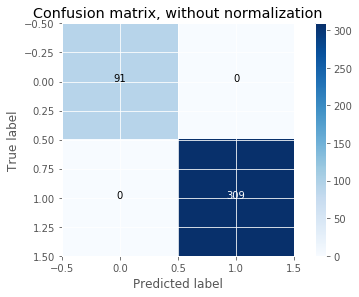

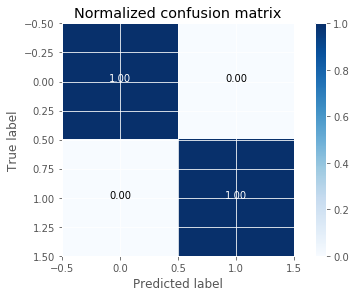

In [41]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [42]:
scores = cross_val_score(rbf_svc, X, y, cv = 5)
print ('accuracy : ',np.mean(scores) )

accuracy :  0.98352243139


# KERNELIZED RIDGE REDGRESSION

In [43]:
x=df.drop(['Class'],axis=1).values
x_df=df.drop(['Class'],axis=1)
y=df.Class.values
x_scaled=scale(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
linear=KernelRidge(kernel='linear',alpha=0.1)
linear.fit(x_train,y_train)
linear_pred=linear.predict(x_test)
confusion_matrix(y_test, linear_pred.round(), labels= [1,2])

array([[ 51,  29],
       [ 88, 173]])

In [45]:
from sklearn.metrics import r2_score
print ('R_square score :', r2_score(y_test,linear_pred))

R_square score : -3.65126473399


In [46]:
poly = GridSearchCV(KernelRidge(kernel = 'polynomial', coef0 = 1, gamma = 1), cv = 5, param_grid = {'degree':[2,4,7]})
poly.fit(x_train, y_train)
poly_pred = poly.predict(x_test)
confusion_matrix(y_test, poly_pred.round(), labels = [1,2])

array([[ 80,   2],
       [ 13, 300]])

In [47]:
from sklearn.metrics import r2_score
print ('R_square score :', r2_score(y_test,poly_pred))

R_square score : 0.687914281895


In [48]:
rbf=GridSearchCV(KernelRidge(kernel='rbf'),cv=5,param_grid={"alpha":[0.1, 0.5, 1, 2, 4]})
rbf.fit(x_train,y_train)
rbf_pred=rbf.predict(x_test)
confusion_matrix(y_test, rbf_pred.round(), labels = [1,2])

array([[ 10,   0],
       [ 61, 137]])

In [49]:
from sklearn.metrics import r2_score
print ('R_square score :', r2_score(y_test,rbf_pred))

R_square score : -7.81200198326


### Kernelized Ridge Regression is a regression algorithm that  is used as a classifier. So we use the R_square as the measure for krr, some of the values have been mishandled in the krr due to round off conversion, which is leading to the bad performance.

# Performance Analysis

As per the R_square values for krr and accuracy and confusion matrix values for the rest of the algorithms :
<li> LOGISTIC REGRESSION :
       - accuracy :  0.909553415959
       - Confusion matrix, without normalization
          [[ 73  18]
           [ 20 289]]
<li> SOFT MARGIN LINEAR SVM :
       - accuracy :  0.905045890912
       - Confusion matrix, without normalization
          [[ 81  10]
           [ 26 283]]
<li> SOFT MARGIN POLY SVM :
       - accuracy :  0.943539781499
       - Confusion matrix, without normalization
          [[ 78  13]
           [ 12 297]]
<li> SOFT MARGIN RBF SVM :
       - accuracy :  0.98352243139
       - Confusion matrix, without normalization
          [[ 91  0]
           [  4 305]]
<li> HARD MARGIN LINEAR SVM :
       - accuracy :  0.903547137795
       - Confusion matrix, without normalization
          [[ 80  11]
           [ 26 283]]
<li> HARD MARGIN POLY SVM :
       - accuracy :  0.946041034631
       - Confusion matrix, without normalization
          [[ 78  13]
           [ 10 299]]
<li> HARD MARGIN RBF SVM :
       - accuracy :  0.98352243139
       - Confusion matrix, without normalization
          [[ 91   0]
           [  0 309]]
<li> POLY krr : 
        - R_square score : 0.687914281895
       - Confusion matrix, without normalization
          [[ 80  2]
           [ 13 300]]
<li> LINEAR krr : 
        - R_square score : -3.65126473399
       - Confusion matrix, without normalization
          [[ 51  29]
           [ 88 173]]
<li> RBF krr : 
        - R_square score : -7.81200198326
       - Confusion matrix, without normalization
          [[ 10   0]
           [ 61 137]]          